### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [39]:
# mount Kelly's Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
# read file
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Module5/assignment5_1_starter/data/coupons.csv')

In [41]:
# explore data first 5 rows
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [42]:
# explore columns and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [43]:
# fill blank data with zeros
data_filled = data.fillna(0)

4. What proportion of the total observations chose to accept the coupon?



In [44]:
# use loc to filter dataframe column 'Y' equals 1)
# calculate (len of filtered dataframe) divided by (len of dataframe)
accepted = len(data_filled.loc[data_filled['Y'] == 1]) / len(data_filled)
accepted

0.5684326710816777

### **Kelly Lieu Observation:** <br/>
56.84% of observations accepted coupons

5. Use a bar plot to visualize the `coupon` column.

In [45]:
# see 'Y' column value counts
data_filled['Y'].value_counts()

,count
Y,
1,7210
0,5474


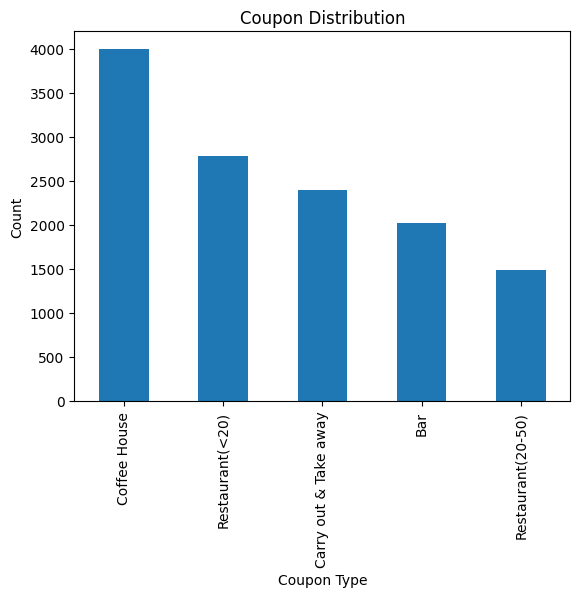

In [46]:
# get value counts of 'coupon' column
# create barplot with title and axes lables
coupon_barplot = data_filled['coupon'].value_counts().plot(kind='bar')
plot_title = coupon_barplot.set_title('Coupon Distribution')
plot_x = coupon_barplot.set_xlabel('Coupon Type')
plot_y = coupon_barplot.set_ylabel('Count')

### **Kelly Lieu Observation:**<br/>
The most accepted coupons is for Coffee House, followed by restaurants less than 20 minutes away, and then Carry out & Take away.


6. Use a histogram to visualize the temperature column.

In [47]:
# see 'temperature' column value counts
data_filled['temperature'].value_counts()

,count
temperature,
80,6528
55,3840
30,2316


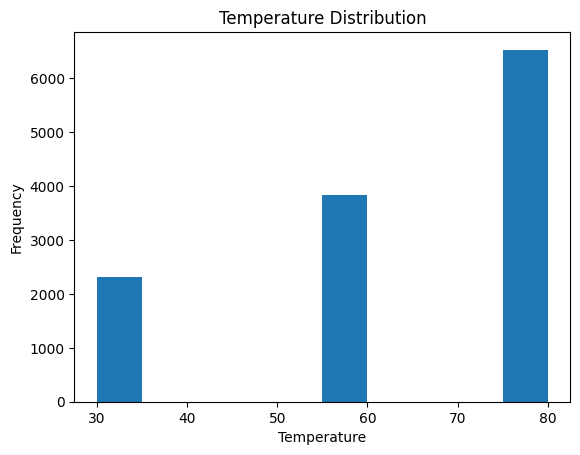

In [48]:
# get 'temperature' column from filled dataframe
# create histogram with title and axes lables
temperature_hist = data_filled['temperature'].plot(kind='hist')
plot_title = temperature_hist.set_title('Temperature Distribution')
plot_x = temperature_hist.set_xlabel('Temperature')

### **Kelly Lieu Observation:**<br/>
The temperature when most coupons are accepted is at 80 degrees.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [49]:
# see value counts in column 'coupon' to get exact values format
data_filled['coupon'].value_counts()

,count
coupon,
Coffee House,3996
Restaurant(<20),2786
Carry out & Take away,2393
Bar,2017
Restaurant(20-50),1492


### **Kelly Lieu Observation:**<br/>
Note the total number of rows in bar-related dataset is 2017 rows.

In [50]:
# create new dataframe by using loc to filter dataframe by column 'coupon' equals 'Bar'
bar_data = data_filled.loc[data_filled['coupon'] == 'Bar']
# make sure output is a dataframe, to be used for calculations to follow
print(type(bar_data))

<class 'pandas.core.frame.DataFrame'>


2. What proportion of bar coupons were accepted?


In [101]:
# use loc to filter bar dataframe by column 'Y' equals 1
# calculate (len of filtered bar dataframe) divided by (len of BAR dataframe)
bar_coupons_accepted = len(bar_data.loc[bar_data['Y'] == 1]) / len(bar_data)
bar_coupons_accepted

0.41001487357461575

### **Kelly Lieu Observation:** <br/>
41% of bar coupons were accepted.

In [100]:
# use loc to filter bar dataframe by column 'Y' equals 1
# calculate (len of filtered bar dataframe) divided by (len of ENTIRE dataframe)
Total_accepted_were_bar = len(bar_data.loc[bar_data['Y'] == 1]) / len(data_filled)
Total_accepted_were_bar

0.065200252286345

### **Kelly Lieu Observation:** <br/>
6.52% of all coupons accepted were bar coupons

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [53]:
# see null values
bar_data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [54]:
# see value counts in 'Bar' column from bar data
bar_data['Bar'].value_counts()

,count
Bar,
never,830
less1,570
1~3,397
4~8,150
gt8,49
0,21


In [55]:
# standardize values by replacing values in 'Bar' columns
# then group by people who went to bar 3 or less times
replaceValues = {'never': '3less', 'less1': '3less', '1~3': '3less', 0: '3less', '4~8': '4more', 'gt8': '4more'}
bar_group = bar_data.replace({'Bar': replaceValues})
bar_group['Bar'].value_counts()

,count
Bar,
3less,1818
4more,199


### **Kelly Lieu Observation:** <br/>
New dataframe for people who went to the bar 3 or less times from bar coupons data consists of 1818 observations.

In [56]:
# create variables for two criteria
# one, filter by count of who went to the bar 3 or less times a month, replaced values
# two, filter by count of accepted coupons, column 'Y' = 1
filter_3less = (bar_group['Bar'] == '3less')
filter_accepted = (bar_group['Y'] == 1)

In [57]:
# see variable values
filter_3less.value_counts()

,count
Bar,
True,1818
False,199


In [58]:
# compare output to verify variable output matches true value counts
len(bar_group.loc[filter_3less])

1818

In [59]:
# see variable values
filter_accepted.value_counts()

,count
Y,
False,1190
True,827


In [60]:
# verify variable output matches value counts
len(bar_group.loc[filter_accepted])

827

In [61]:
# use loc to filter bar dataframe by two criteria
# calculate (len of FILTERED BAR dataframe) divided by (len of BAR dataframe)
went_bar_3orless_accepted = len(bar_group.loc[filter_3less & filter_accepted])/len(bar_data)
went_bar_3orless_accepted

0.3341596430342092

### **Kelly Lieu Observation:** <br/>
33.41% of bar coupons were accepted by people who went to the bar 3 or less times a month.

In [62]:
# use loc to filter bar dataframe by two criteria
# calculate (len of TILDA~(FILTERED BAR dataframe)) divided by (len of BAR dataframe)
went_bar_NOT3orless_accepted = len(bar_group.loc[~(filter_3less & filter_accepted)])/len(bar_data)
went_bar_NOT3orless_accepted

0.6658403569657908

### **Kelly Lieu Observation:** <br/>
66.58% of bar coupons were accepted by people who went to the bar 4 or more times a month. This indicates that people who went to the bar more than 4 times a month were significantly more likely to accept a bar coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [63]:
# see value counts in 'age' column from bar data
bar_data['age'].value_counts()

,count
age,
21,417
26,395
31,339
50plus,283
36,209
41,178
46,109
below21,87


In [64]:
# create new dataframe with standardized age values
# standardize values by replacing values in 'age' column
# then group by age over25
replaceValues = {'21': 'under25', '26':'over25', '31': 'over25', '50plus': 'over25', '36': 'over25', '41': 'over25', '46': 'over25', 'below21': 'under25'}
bar_group_age = bar_data.replace({'age': replaceValues})

In [65]:
# check standardized value counts in new dataframe
bar_group_age['age'].value_counts()

,count
age,
over25,1513
under25,504


In [66]:
# check len of new dataframe to make sure rows are not dropped
len(bar_group_age)

2017

### **Kelly Lieu Observation:** <br/>
New dataframe for people age over 25 in bar coupons data consists of 1513 observations.

In [67]:
# create new dataframe to further standardize data
# standardize values by replacing values in 'Bar' column
# then group by went to bar more than 1 time
replaceValues = {'never': 'less1', '1~3': 'more1', 0: 'less1', '4~8': 'more1', 'gt8': 'more1'}
bar_group_over25_more1 = bar_group_age.replace({'Bar': replaceValues})
bar_group_over25_more1['Bar'].value_counts()

,count
Bar,
less1,1421
more1,596


In [68]:
# create variables for three criteria
# one, filter by age over 25, column 'age' == 'over25'
# two, filter by count of who went to the bar 1 or more times a month, replaced values
# three, filter by count of accepted coupons, column 'Y' = 1
filter_over25 = (bar_group_over25_more1['age'] == 'over25')
filter_more1 = (bar_group_over25_more1['Bar'] == 'more1')
filter_accepted = (bar_group_over25_more1['Y'] == 1)

In [69]:
# check output of numerator
len(bar_group_over25_more1.loc[filter_over25 & filter_more1 & filter_accepted])

292

### **Kelly Lieu Observation:** <br/>
292 of observations consist of age over 25 who went to bar more than once and accepted coupons.

In [70]:
# use loc to filter bar dataframe by three criteria
# calculate (len of FILTERED BAR dataframe) divided by (len of BAR dataframe)
bar_group_over25_more1_accepted = len(bar_group_over25_more1.loc[filter_over25 & filter_more1 & filter_accepted])/len(bar_data)
bar_group_over25_more1_accepted

0.14476945959345563

### **Kelly Lieu Observation:** <br/>
14.47% of observations are people age over 25 who went to bar more than once and accepted coupons.

In [71]:
# use loc to filter bar dataframe by three criteria
# calculate (len of TILDA~(FILTERED BAR dataframe)) divided by (len of BAR dataframe)
bar_group_NOTover25_more1_accepted = len(bar_group.loc[~(filter_over25 & filter_more1 & filter_accepted)])/len(bar_data)
bar_group_NOTover25_more1_accepted

0.8552305404065443

### **Kelly Lieu Observation:** <br/>
85.52% of bar coupons were accepted by people who were not over age 25 AND went to the bar 1 or more times a month. This indicates that younger people who went to the bar more than once a month were significantly more likely to accept a bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [72]:
# reuse previous dataframe with more1 group, explore exact spelling of column names
bar_group_over25_more1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

In [73]:
# rename column to correct spelling for 'passenger'
bar_group_clean = bar_group_over25_more1.rename(columns={'passanger':'passenger'})
# explore values in column to see exact exact spelling of value for future filtering
bar_group_clean['passenger'].value_counts()

,count
passenger,
Alone,1200
Friend(s),337
Partner,274
Kid(s),206


In [74]:
# explore 'occupation' column to get exact spelling of value for future filtering
bar_group_clean['occupation'].value_counts()

,count
occupation,
Unemployed,301
Student,251
Computer & Mathematical,232
Sales & Related,178
Education&Training&Library,140
Management,119
Office & Administrative Support,105
Arts Design Entertainment Sports & Media,100
Business & Financial,89


In [75]:
# create variables for 4 criteria
# one, filter by count of who went to the bar 1 or more times a month
# two, filter by count of TILDA~(passengers == Kid(s))
# three, filter by count of TILDA~(occupation == Farming Fishing & Forestry)
# four, filter by count of accepted coupons, column 'Y' = 1
filter_more1 = (bar_group_clean['Bar'] == 'more1')
filter_passenger = ~(bar_group_clean['passenger'] == 'Kid(s)')
filter_occupation = ~(bar_group_clean['occupation'] == 'Farming Fishing & Forestry')
filter_accepted = (bar_group_clean['Y'] == 1)

In [76]:
# check if tilda filter is accurate
filter_passenger.value_counts()

,count
passenger,
True,1811
False,206


In [77]:
# use loc to filter bar dataframe by four criteria
# calculate (len of (FILTERED BAR dataframe with TILDAs~ on passenger and occupation column)) divided by (len of BAR dataframe)
bar_group_more1_notkid_notfarm_accepted = len(bar_group_clean.loc[filter_more1 & filter_passenger & filter_occupation & filter_accepted])/len(bar_data)
bar_group_more1_notkid_notfarm_accepted

0.19484382746653445

### **Kelly Lieu Observation:** <br/>
19.48% of bar coupons were accepted by people who went to the bar 1 or more times a month AND did not have kids as passengers AND did not have an occupation in the farming, fishing, or forestry.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# mount Kelly's Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
# read file
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Module5/assignment5_1_starter/data/coupons.csv')
# fill blank data with zeros
data_filled = data.fillna(0)
# create new dataframe by using loc to filter dataframe by column 'coupon' equals 'Bar'
bar_data = data_filled.loc[data_filled['coupon'] == 'Bar']
# explore exact spelling of column names
bar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

In [80]:
# check age column values for data cleanup
bar_data['age'].value_counts()

,count
age,
21,417
26,395
31,339
50plus,283
36,209
41,178
46,109
below21,87


In [81]:
# create new dataframe with standardized age values
# standardize values by replacing values in 'age' column
# then group by age under30, check new age value counts
# later use 'age' == 'under30'
replaceValues30 = {'21': 'under30', '26':'under30', '31': 'over30', '50plus': 'over30', '36': 'over30', '41': 'over30', '46': 'over30', 'below21': 'under30'}
bar_data_under30 = bar_data.replace({'age': replaceValues30})
bar_data_under30['age'].value_counts()

,count
age,
over30,1118
under30,899


In [82]:
# explore 'maritalStatus' column to see exact spelling of values for future filtering
bar_data_under30['maritalStatus'].value_counts()
# later use ['maritalStatus'] == 'Widowed'

,count
maritalStatus,
Married partner,882
Single,661
Unmarried partner,378
Divorced,75
Widowed,21


In [83]:
# check 'RestaurantLessThan20' column for data cleanup
bar_data_under30['RestaurantLessThan20'].value_counts()

,count
RestaurantLessThan20,
1~3,878
4~8,568
less1,325
gt8,186
never,37
0,23


In [84]:
# create new dataframe with standardized restaurant values
# standardize values by replacing values in 'RestaurantLessThan20' column
# check standardize values in value_counts()
# later filter values by 'more4'
replaceValuesRestaurant = {'4~8': 'more4', 'gt8':'more4'}
bar_data_und30_restnt = bar_data.replace({'RestaurantLessThan20': replaceValuesRestaurant})
bar_data_und30_restnt['RestaurantLessThan20'].value_counts()

,count
RestaurantLessThan20,
1~3,878
more4,754
less1,325
never,37
0,23


In [85]:
# check values  in income column for data cleanup
bar_data_und30_restnt['income'].value_counts()

,count
income,
$25000 - $37499,318
$100000 or More,291
$12500 - $24999,288
$37500 - $49999,267
$50000 - $62499,262
Less than $12500,165
$75000 - $87499,151
$87500 - $99999,145
$62500 - $74999,130


In [86]:
# create new dataframe with standardized income values
# standardize values by replacing values in 'income' column
# later filter values by 'less50k'
replaceValuesIncome = {'$25000 - $37499': 'less50k', '$12500 - $24999':'less50k', '$37500 - $49999':'less50k', 'Less than $12500':'less50k'}
bar_data_und30_restnt_inc = bar_data.replace({'income': replaceValuesIncome})

In [87]:
# create new dataframe to further standardize data
# standardize values by replacing values in 'Bar' column
# then group by went to bar more than 1 time
replaceValues = {'never': 'less1', '1~3': 'more1', 0: 'less1', '4~8': 'more1', 'gt8': 'more1'}
bar_data_und30_restnt_inc_more1 = bar_data_und30_restnt_inc.replace({'Bar': replaceValues})
bar_data_und30_restnt_inc_more1['Bar'].value_counts()

,count
Bar,
less1,1421
more1,596


In [88]:
# create variables for 6 criteria
# one, filter by count of who went to the bar 1 or more times a month
# two, filter by count of TILDA~(passangers == Kid(s))
# three, filter by count of TILDA~(maritalStatus == Widowed)
# four, filter by count of under age 30, age == 'under30'
# five, filter by count of got to cheap restaurants more than 4 times
# six, filter by count of income less than 50 k, 'income' == 'less50k'
# seven, filter by count of accepted coupons, column 'Y' = 1
# use | for OR

filter_more1 = (bar_data_und30_restnt_inc_more1['Bar'] == 'more1')
filter_passenger = ~(bar_data_und30_restnt_inc_more1['passanger'] == 'Kid(s)')
filter_widow = ~(bar_data_und30_restnt_inc_more1['maritalStatus'] == 'Widowed')
filter_under30 = (bar_data_und30_restnt_inc_more1['age'] == 'under30')
filter_restnt = (bar_data_und30_restnt_inc_more1['RestaurantLessThan20'] == 'more4')
filter_income = (bar_data_und30_restnt_inc_more1['income'] == 'less50k')
filter_accepted = (bar_data_und30_restnt_inc_more1['Y'] == 1)

In [89]:
# use loc to filter bar dataframe by seven criteria
# calculate (len of (FILTERED BAR dataframe with TILDAs~ on passanger and maritalStatus column)) divided by (len of BAR dataframe)
bar_group_7criteria = len(bar_data_und30_restnt_inc_more1.loc[
    (filter_more1 & filter_passenger & filter_widow
     ) | (filter_more1 & filter_under30
          ) | (filter_restnt & filter_income) & filter_accepted]
                          )/len(bar_data)
bar_group_7criteria

0.27317798710956864

### **Kelly Lieu Observation:** <br/>
27.31% of bar coupons were accepted by people who <br/>
EITHER go to bars more than once a month, had passengers that were not a kid, and were not widowed <br/>
OR go to bars more than once a month and are under the age of 30 <br/>
OR go to cheap restaurants more than 4 times a month and income is less than 50K.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [105]:
df = pd.DataFrame ({
    'Overall Bar Coupons Accepted': [bar_coupons_accepted],
    'Go to Bar <3 times': [went_bar_3orless_accepted],
    'Go to Bar >3 times': [went_bar_NOT3orless_accepted],
    'Go to Bar 1+ times age over 25': [bar_group_over25_more1_accepted],
    'Go to Bar 1+ times age under 25': [bar_group_NOTover25_more1_accepted],
    'Go to Bar 1+ times no kid not farmer': [bar_group_more1_notkid_notfarm_accepted],
    'Bar 1+ not kid not widow OR bar 1+ under 30 OR restaurant 4+ <50k' : [bar_group_7criteria]
    })

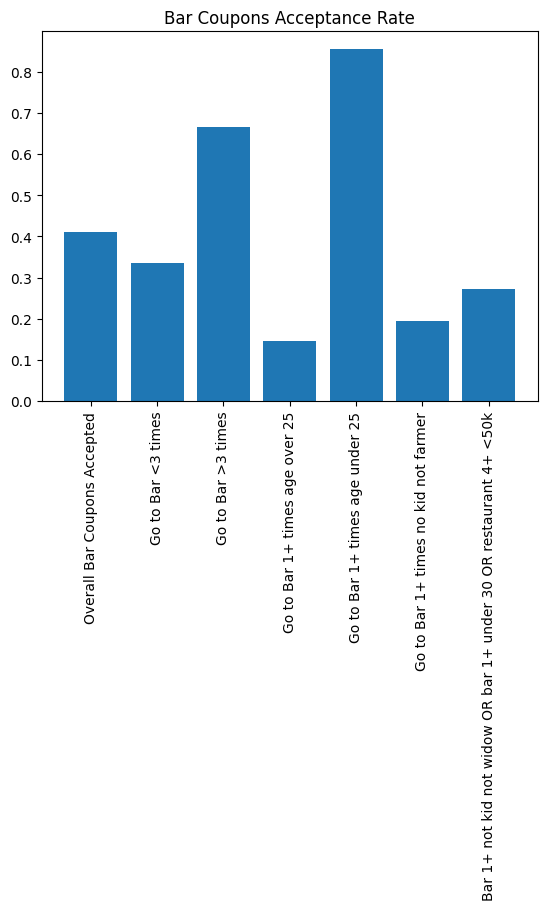

In [106]:
#plt.bar(df.columns, df.iloc[0])
plt.bar(df.columns, df.iloc[0])
plt.title('Bar Coupons Acceptance Rate')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

### **Kelly Lieu Observation:** <br/>
The overall bar coupon acceptance rate is about 41%. This means 41% of bar coupons are accepted. Two factors are above that base rate, (1) drivers that go to the bar more than 3 times a month and (2) drivers under age 25 that go to the bar more than once a month, may indicate that age and bar going frequency may be the highest contributors of positive bar coupon acceptance.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [110]:
# read file
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Module5/assignment5_1_starter/data/coupons.csv')
# fill blank data with zeros
data_filled = data.fillna(0)
# create new dataframe by using loc to filter dataframe by column 'coupon' equals 'Bar'
coffee_data = data_filled.loc[data_filled['coupon'] == 'Coffee House']
# explore exact spelling of column names
coffee_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0


In [114]:
len(coffee_data)

3996

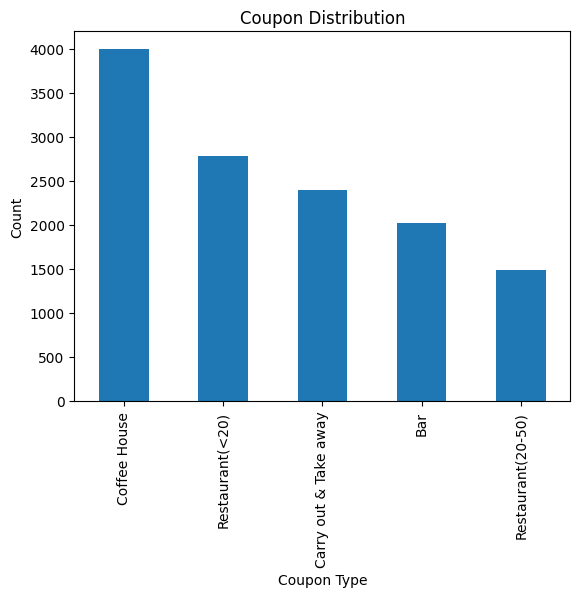

In [123]:
# get value counts of 'coupon' column
# create barplot with title and axes lables
coupon_barplot = data_filled['coupon'].value_counts().plot(kind='bar')
plot_title = coupon_barplot.set_title('Coupon Distribution')
plot_x = coupon_barplot.set_xlabel('Coupon Type')
plot_y = coupon_barplot.set_ylabel('Count')

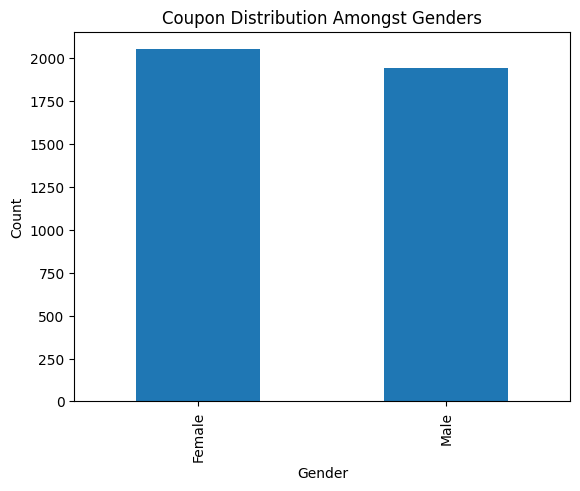

In [120]:
# get value counts of 'coupon' column
# create barplot with title and axes lables
coupon_barplot = coffee_data['gender'].value_counts().plot(kind='bar')
plot_title = coupon_barplot.set_title('Coupon Distribution Amongst Genders')
plot_x = coupon_barplot.set_xlabel('Gender')
plot_y = coupon_barplot.set_ylabel('Count')

In [119]:
# calculate rate of coffee coupons accepted
female_accepted = len(coffee_data.loc[(coffee_data['Y'] == 1)]) / len(coffee_data)
female_accepted

0.49924924924924924

In [115]:
# calculate rate of coffee coupons accepted by females
female_accepted = len(coffee_data.loc[(coffee_data['gender'] == 'Female') & (coffee_data['Y'] == 1)]) / len(coffee_data)
female_accepted

0.2527527527527528

In [117]:
# calculate rate of coffee coupons accepted by TILDA~ females
# alternatively same output using this for filter: ['gender'] == 'Male')
NOTfemale_accepted = len(coffee_data.loc[~(coffee_data['gender'] == 'Female') & (coffee_data['Y'] == 1)]) / len(coffee_data)
NOTfemale_accepted

0.2464964964964965

In [118]:
# calculate rate of coffee coupons accepted by males
male_accepted = len(coffee_data.loc[(coffee_data['gender'] == 'Male') & (coffee_data['Y'] == 1)]) / len(coffee_data)
male_accepted

0.2464964964964965

### **Kelly Lieu Observation:** <br/>
Coffee House coupons are appear to be the most . Two factors are above that base rate, (1) drivers that go to the bar more than 3 times a month and (2) drivers under age 25 that go to the bar more than once a month, may indicate that age and bar going frequency may be the highest contributors of positive bar coupon acceptance.